# Machine Learning Workshop Practice: Part I  


In this part, you will learn to do a binary classification of a complex point cloud.

Recall the network with one hidden layer:

<img src="img_planar/slide37.png" style="width:600px;height:420px;">


**With the following example, we will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Compare the behavior with more or less training
- Compare the behavior with a different number of hidden units in the hidden layer  
_All of this with Keras on Tensorflow_


## 1 - Packages ##

Let's first import all the packages that you will need during this exercise.
- [tensorflow](https://www.tensorflow.org) an open source platform developped by Google that has efficient computation structures (2.X version)
- [numpy](http://www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- classif_utils provides some functions for data loading and plotting used in this exercise

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from classif_utils import plot_decision_boundary, load_flower, load_spiral

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's load a dataset to work on.  
Here we want to classify a set of points into 2 classes and your goal is to build a model to fit the data.  
We'll create a 2-class dataset where:
- your features `X` are a matrix which contains [x1, x2] for each entry: the coordinates of the points. This would be your `input layer`.
- your labels `Y` are a vector which contains a single value: 0 or 1 for each entry (encoding for red or blue). This would be your `output layer`.

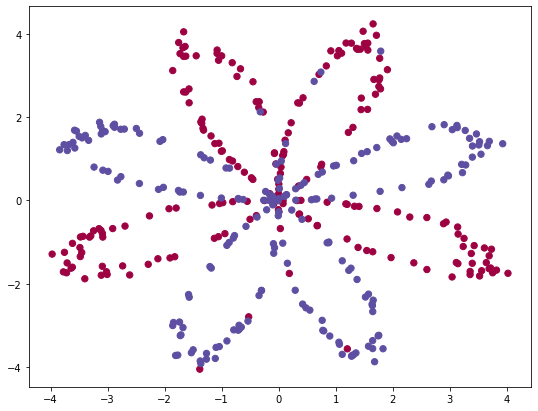

In [2]:
# Choose a dataset
N = 400  # nb of training examples
X, Y = load_flower(N)
# X, Y = sklearn.datasets.make_moons(n_samples=N, noise=.2)
# X, Y = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=200, n_features=2, n_classes=2, shuffle=True, random_state=None)
# X, Y = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
# X, Y = load_spiral(N)
Y = Y.reshape(len(Y),1)

# Visualize the data using matplotlib
plt.figure(figsize=(9,7))
plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(len(Y)), s=40, cmap=plt.cm.Spectral)

**Understanding the data**  
What is the `shape` of the variables `X` and `Y`?  
How many training examples do you have?

In [4]:
### START CODE HERE ###
shape_x = None
shape_y = None
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_x))
print ('The shape of Y is: ' + str(shape_y))
print ('I have m = %d training examples!' % (N))

## 3 - Simple Logistic Regression

Before diving into neural network, let's first see how logistic regression performs on this example.  
Recall:


<img src="img_planar/slide25.png" style="width:600px;height:420px;">

You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X, Y);

C:\Users\Segolene\Documents\Canada\McGill\workshop\3Dec2019\TransferStyle\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Segolene\Documents\Canada\McGill\workshop\3Dec2019\TransferStyle\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


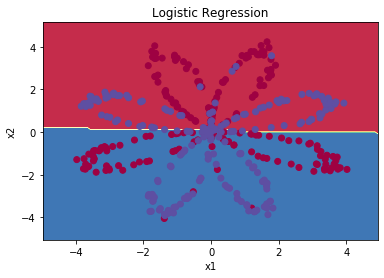

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X)
LR_predictions = LR_predictions.reshape(len(LR_predictions),1)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y.reshape(len(Y)),LR_predictions) + np.dot(1-Y.reshape(len(Y)),1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: Logistic regression doesn't perform well because the dataset is not linearly separable. How neural network will seperate the data ? Let's try it! 

## 4 - Simple Neural Network

You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="img_planar/classification_kiank.png" style="width:600px;height:300px;">


**Workflow**: To build a Neural Network manually:
    1. Create the network structure (number of layers, type of layers, sizes of them). 
    2. Initialize the model's parameters
    3. Iterations over:
        - forward propagation
        - loss calculation
        - backward propagation
        - parameters update (optimization)
        
        
_Mathematically_

For one example $x^{(i)}$:

**Forward pass:**
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

**Loss**:
We can compute the cost $J$ during the training, at each iteration given the current predictions on all the examples with: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Backward pass**:
<img src="img_planar/backprop_equations.png" style="width:450px;height:300px;">


**Optimization**:

<img src="img_planar/slide30.png" style="width:600px;height:420px;">

General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.


**Visualization**: A good learning rate makes the gradient descent algorithm converge, a bad learning rate makes it diverge.  
[Ref images: http://scs.ryerson.ca/~aharley/neural-networks/]

<img src="img_planar/sgd.gif" style="width:400;height:400;"> <img src="img_planar/sgd_bad.gif" style="width:400;height:400;">



### 4.1 - Create the network structure ####

We need three variables:
    - n_x: the size of the input layer (help you with the shape of X)
    - n_h: the size of the hidden layer (fix it to 4 for now) 
    - n_y: the size of the output layer (help you with the shape of Y)

In [7]:
# Layer sizes

### START CODE HERE ###
n_x = None
n_h = None
n_y = None
### END CODE HERE ###

print("input layer size: n_x = " + str(n_x))
print("hidden layer size: n_h = " + str(n_h))
print("output layer size: n_y = " + str(n_y))

In [8]:
# Define model structure with Keras:

### START CODE HERE ###
input_layer = Input(shape=(<size of input>,))
hidden_layer = Dense(<size of hidden units>, activation=<activation name>)(<previous layer>)  # you can use tanh activation
output_layer = Dense(<size of output>, activation=<activation name>(<previous layer>)  # activation used for outputs is sigmoid
### END CODE HERE ###
model = Model(inputs=input_layer, outputs=output_layer)

### 4.2 - Initialize parameters:

Lucky! This is built-in in the Keras model.


### 4.3 - Learning iterations

Choose a **loss** and an **optimization** method.  
- In this example, we compute the cost **J** introduced above, this is the cross-entropy loss:  

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$$

- In this example, we use gradient descent as an optimizer.

In [9]:
myLoss = 'binary_crossentropy'
myOpt = 'sgd'  # 'sgd' is the default stochastic gradient descent

# we can also define our own optimizer:
from keras import optimizers
myOpt2 = optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

### 4.4 - Integrate parts 4.1, 4.2 and 4.3

Its time to compile the defined model and to train it.

In [15]:
# compile the keras model
model.compile(loss=myLoss, optimizer=myOpt, metrics=['accuracy'])

In [16]:
# Visualize the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the keras model on the dataset
history = model.fit(X, Y, epochs=200, verbose=0)

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### 4.5 Predictions

We use our model to compute the probability of having label `1`.  
Then use a threshold on the output such that:
$y_{prediction} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  

In [11]:
predictions = model.predict(X)
print(predictions[:5])  # predictions of the 5 first points

In [12]:
# Apply a threshold to get the label 0 or 1
### START CODE HERE ###
Y_pred = None
### END CODE HERE ###
Y_pred[:5]

It is time to see how our model performs:  
we plot the decision boundaries to see its behaviour all over our domain. 

In [13]:
# Plot the decision boundary

# this can take some time as it computes prediction for all the mesh grid points of our domain 
plot_decision_boundary(lambda x: model.predict(x) > 0.5, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Print accuracy
print ('Accuracy: %d' % float((np.dot(Y_pred.T, Y) + np.dot(1-Y_pred.T, 1-Y))/float(Y.size)*100) + '%')

Did our model converge? Let's try to train it more:  
Tune the number of additional epochs to train.

In [14]:
model.fit(X, Y, epochs=200, verbose=0)

In [15]:
# Plot the decision boundary

# this can take some time as it computes prediction for all the mesh grid points of our domain 
plot_decision_boundary(lambda x: model.predict(x) > 0.5, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Print accuracy
Y_pred = model.predict(X) > 0.5
print ('Accuracy: %d' % float((np.dot(Y_pred.T, Y) + np.dot(1-Y_pred.T, 1-Y))/float(Y.size)*100) + '%')

And... one last time !

In [16]:
model.fit(X, Y, epochs=600, verbose=0)

In [19]:
# Plot the decision boundary

# this can take some time as it computes prediction for all the mesh grid points of our domain 
plot_decision_boundary(lambda x: model.predict(x) > 0.5, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Print accuracy
Y_pred = model.predict(X) > 0.5
print ('Accuracy: %d' % float((np.dot(Y_pred.T, Y) + np.dot(1-Y_pred.T, 1-Y))/float(Y.size)*100) + '%')

The model learns the data patterns! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### 4.6 - Further tuning

How does the behaviour evolves if we change the size of the hidden layer?    
Note: we need to increase the number of epochs with the number of hidden units used.

Accuracy for 1 hidden units: 0.5149999856948853 %
Accuracy for 2 hidden units: 0.6299999952316284 %
Accuracy for 3 hidden units: 0.8600000143051147 %
Accuracy for 4 hidden units: 0.8725000023841858 %
Accuracy for 5 hidden units: 0.8725000023841858 %
Accuracy for 10 hidden units: 0.887499988079071 %
Accuracy for 20 hidden units: 0.887499988079071 %


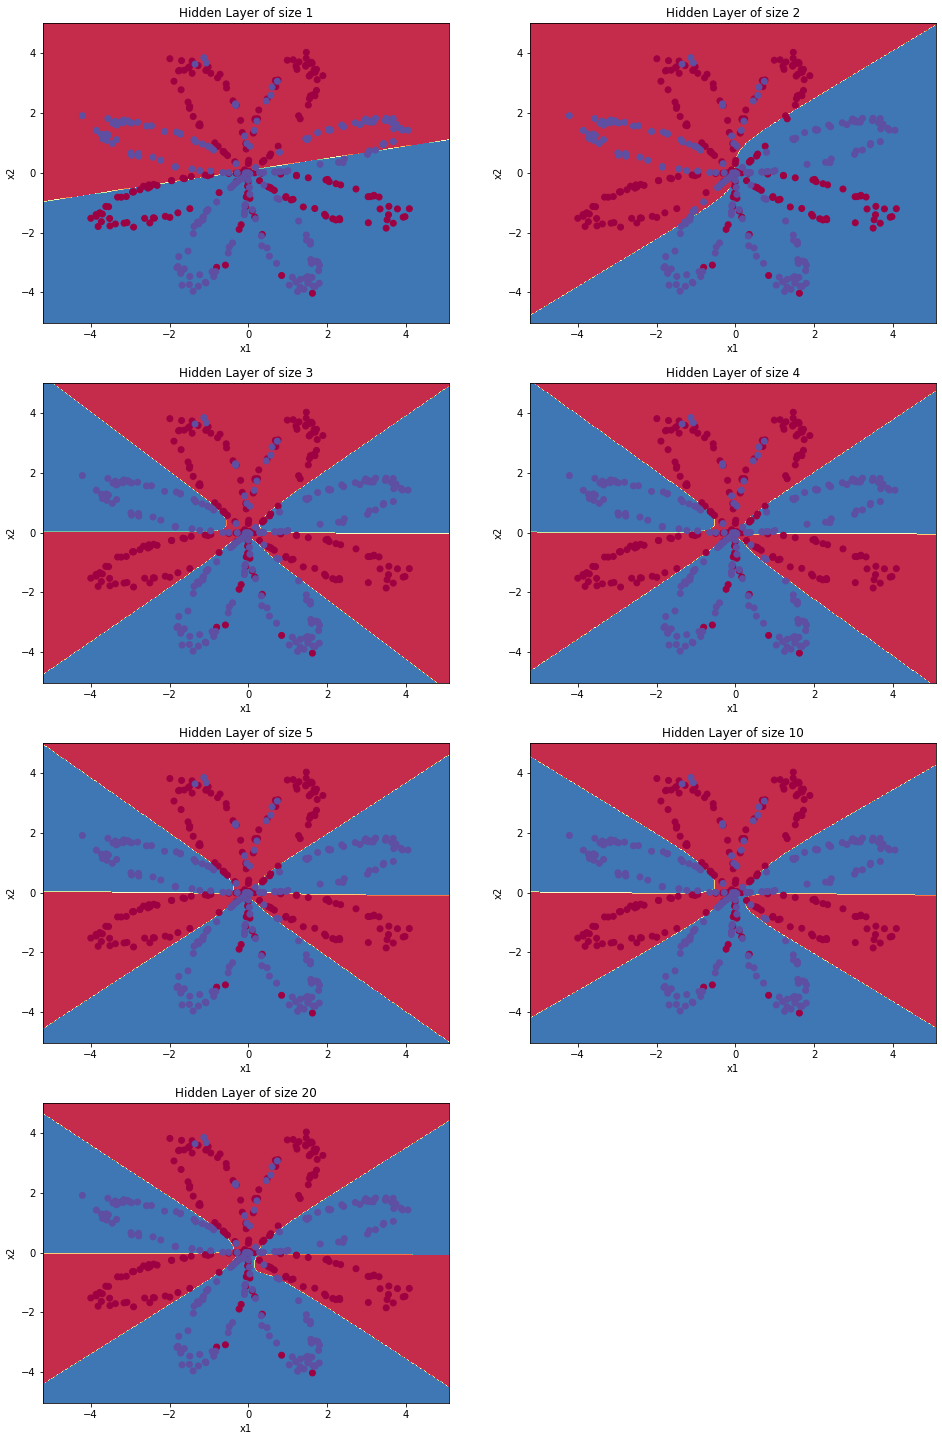

In [46]:
plt.figure(figsize=(16, 32))
n_x = 2
n_y = 1
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    
    a = Input(shape=(n_x,))
    b = Dense(n_h, activation='tanh')(a) 
    o = Dense(n_y, activation='sigmoid')(b)
    mdl = Model(inputs=a, outputs=o)
    mdl.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    history = mdl.fit(X, Y, epochs=n_h*150, verbose=0)
    
    plot_decision_boundary(lambda x: mdl.predict(x) > 0.5, X, Y)
    accuracy = history.history['accuracy'][-1]
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    
    del mdl  # clear model for next iteration

**Interpretation**:

We want a model that doesn't underfit neither overfit the data.  
**Underfitting** means that the model didn't capture the data pattern, like it happened for a very small number of hidden units.  

**Overfitting** means that the model learns so closely to match the data points from the training set that it loses generality, like it can happen for a big number of hidden units.  

_Conclusion: The size of the layer should be adapted to the complexity of the data patterns._

In the flower example, we want to predict one color per leaf, if we have blue points in a red leaf, that is random noise, we don't want to have smaller boundaries inside each leaf to match this noise !  

**Further insights:**
That is why we usually use a separate _validation set_ to control our training (or check techniques like cross-validation to simulate a validation set), and use a separate _test dataset_ to observe the correct accuracy of the model over unknown new data.

Play around and re-run the whole notebook with a new dataset and see how it behaves !

**Congrats, you reached  
THE END OF PART 1**

Reference:
https://sabbiushah.com.np/all-about-neural-network/